<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="http://bokeh.pydata.org/en/latest/_static/bokeh-transparent.png" 
               style="width:70px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial &mdash; Adding Interactions</h1>
       </td>
   </tr>
</table>

In [1]:
from bokeh.io import gridplot, output_notebook, show
from bokeh.plotting import figure


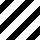
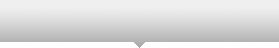
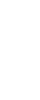
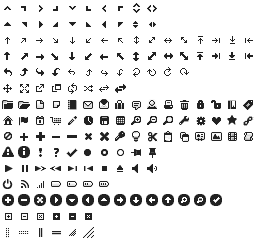
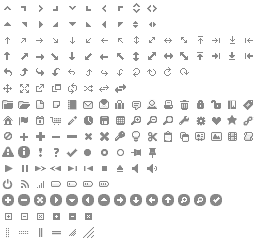
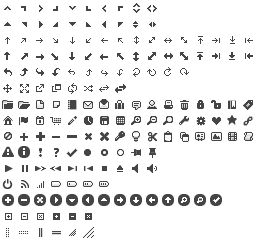
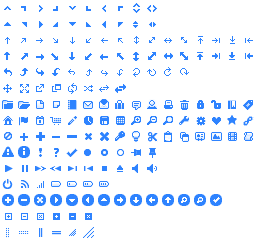
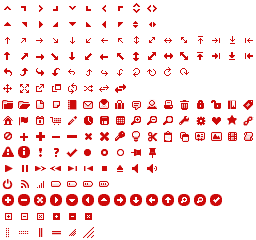
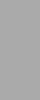
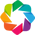
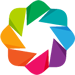
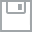
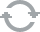
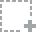
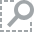
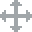
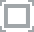
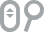

In [2]:
output_notebook()

# Simple Layouts

In order to add widgets or have multiple plots that are linked together, you must first be able to create documents taht contain these separate objects. In the upcoming 0.9.1 release (Jul 2015), it will be possible to easily accomplish this in your own custom templates using ``bokeh.embed.components``. For now you, Bokeh provides simple layout capability for grid plots, VBoxes, and HBoxes (than can be nested). 

An example using ``gridplot`` is shown below:

In [3]:
x = list(range(11))
y0, y1, y2 = x, [10-x for x in x], [abs(x-5) for x in x]

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in an HBox
p = gridplot([[s1, s2, s3]], toolbar_location=None)

# show the results
show(p)

In [4]:
# EXERCISE: create a gridplot of your own



Bokeh also provides the ``vplot`` and ``hplot`` functions to arrange plot objects in vertical or horizontal layouts. 

In [5]:
# EXERCISE: use vplot to arrange a few plots vertically



# Linked Interactions

It is possible to link various interactions between different Bokeh plots. For instance, the ranges of two (or more) plots can be linked, so that when one of the plots is panned (or zoomed, or otherwise has its range changed) the other plots will update in unison. It is also possible to link selections between two plots, so that when items are selected on one plot, the corresponding items on the second plot also become selected. 

## Linked panning

Linked panning (when mulitple plots have ranges that stay in sync) is simple to spell with Bokeh. You simply share the approrpate range objects between two (or more) plots. The example below shows how to accomplish this by linking the ranges of three plots in various ways:

In [6]:
# create a new plot
s1 = figure(width=250, plot_height=250, title=None)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create a new plot and share both ranges
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title=None)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create a new plot and share only one range
s3 = figure(width=250, height=250, x_range=s1.x_range, title=None)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

p = gridplot([[s1, s2, s3]], toolbar_location=None)

# show the results
show(p)

In [7]:
# EXERCISE: create two plots in a gridplot, and link their ranges



## Linked brushing

Linking selections is accomplished in a similar way, by sharing data sources between plots. Note that normally with ``bokeh.plotting`` and ``bokeh.charts`` creating a default data source for simple plots is handled automatically. However to share a data source, we must create them by hand and pass them explicitly. This is illustrated in the example below:

In [8]:
from bokeh.models import ColumnDataSource

x = list(range(-20, 21))
y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

In [9]:
# EXERCISE: create two plots in a gridplot, and link their data sources



# Hover Tools

# Ipython Interactors

In [10]:
import numpy as np
from bokeh.models import Line

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5, 5))
p.line(x, y, color="#2222aa", alpha=0.5, line_width=2, source=source, name="foo")

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    source.data['y'] = A * func(w * x + phi)
    source.push_notebook()

show(p)

In [11]:
from IPython.html.widgets import interact
interact(update, f=["sin", "cos", "tan"], w=(0,10, 0.1), A=(0,5, 0.1), phi=(0, 10, 0.1))

<function __main__.update>

# Bokeh Widgets and Callbacks

## Adding Widgets

## Callbacks for widgets



In [12]:
from bokeh.io import vform
from bokeh.models import Callback, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = Callback(args=dict(source=source), code="""
    var data = source.get('data');
    var f = cb_obj.get('value')
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.trigger('change');
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)

layout = vform(slider, plot)

show(layout)

## Calbacks for selections

In [13]:
from random import random

x = [random() for x in range(500)]
y = [random() for y in range(500)]
color = ["navy"] * len(x)

s = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Select Here")
p.circle('x', 'y', color='color', size=8, source=s, alpha=0.4)

s2 = ColumnDataSource(data=dict(ym=[0.5, 0.5]))
p.line(x=[0,1], y='ym', color="orange", line_width=5, alpha=0.6, source=s2)

s.callback = Callback(args=dict(s2=s2), code="""
    var inds = cb_obj.get('selected')['1d'].indices;
    var d = cb_obj.get('data');
    var ym = 0
    
    if (inds.length == 0) { return; }
    
    for (i = 0; i < d['color'].length; i++) {
        d['color'][i] = "navy"
    }
    for (i = 0; i < inds.length; i++) {
        d['color'][inds[i]] = "firebrick"
        ym += d['y'][inds[i]]
    }
    
    ym /= inds.length
    s2.get('data')['ym'] = [ym, ym]
    
    cb_obj.trigger('change');
    s2.trigger('change');
""")

show(p)